<a href="https://colab.research.google.com/github/vermelho25/analitica/blob/main/Grafico_correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Las libreria para el modelo son:
from sklearn.cluster import KMeans #metodos de clusterizacion - kmeand
from sklearn.metrics import confusion_matrix

1. Se cargan los archivos

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


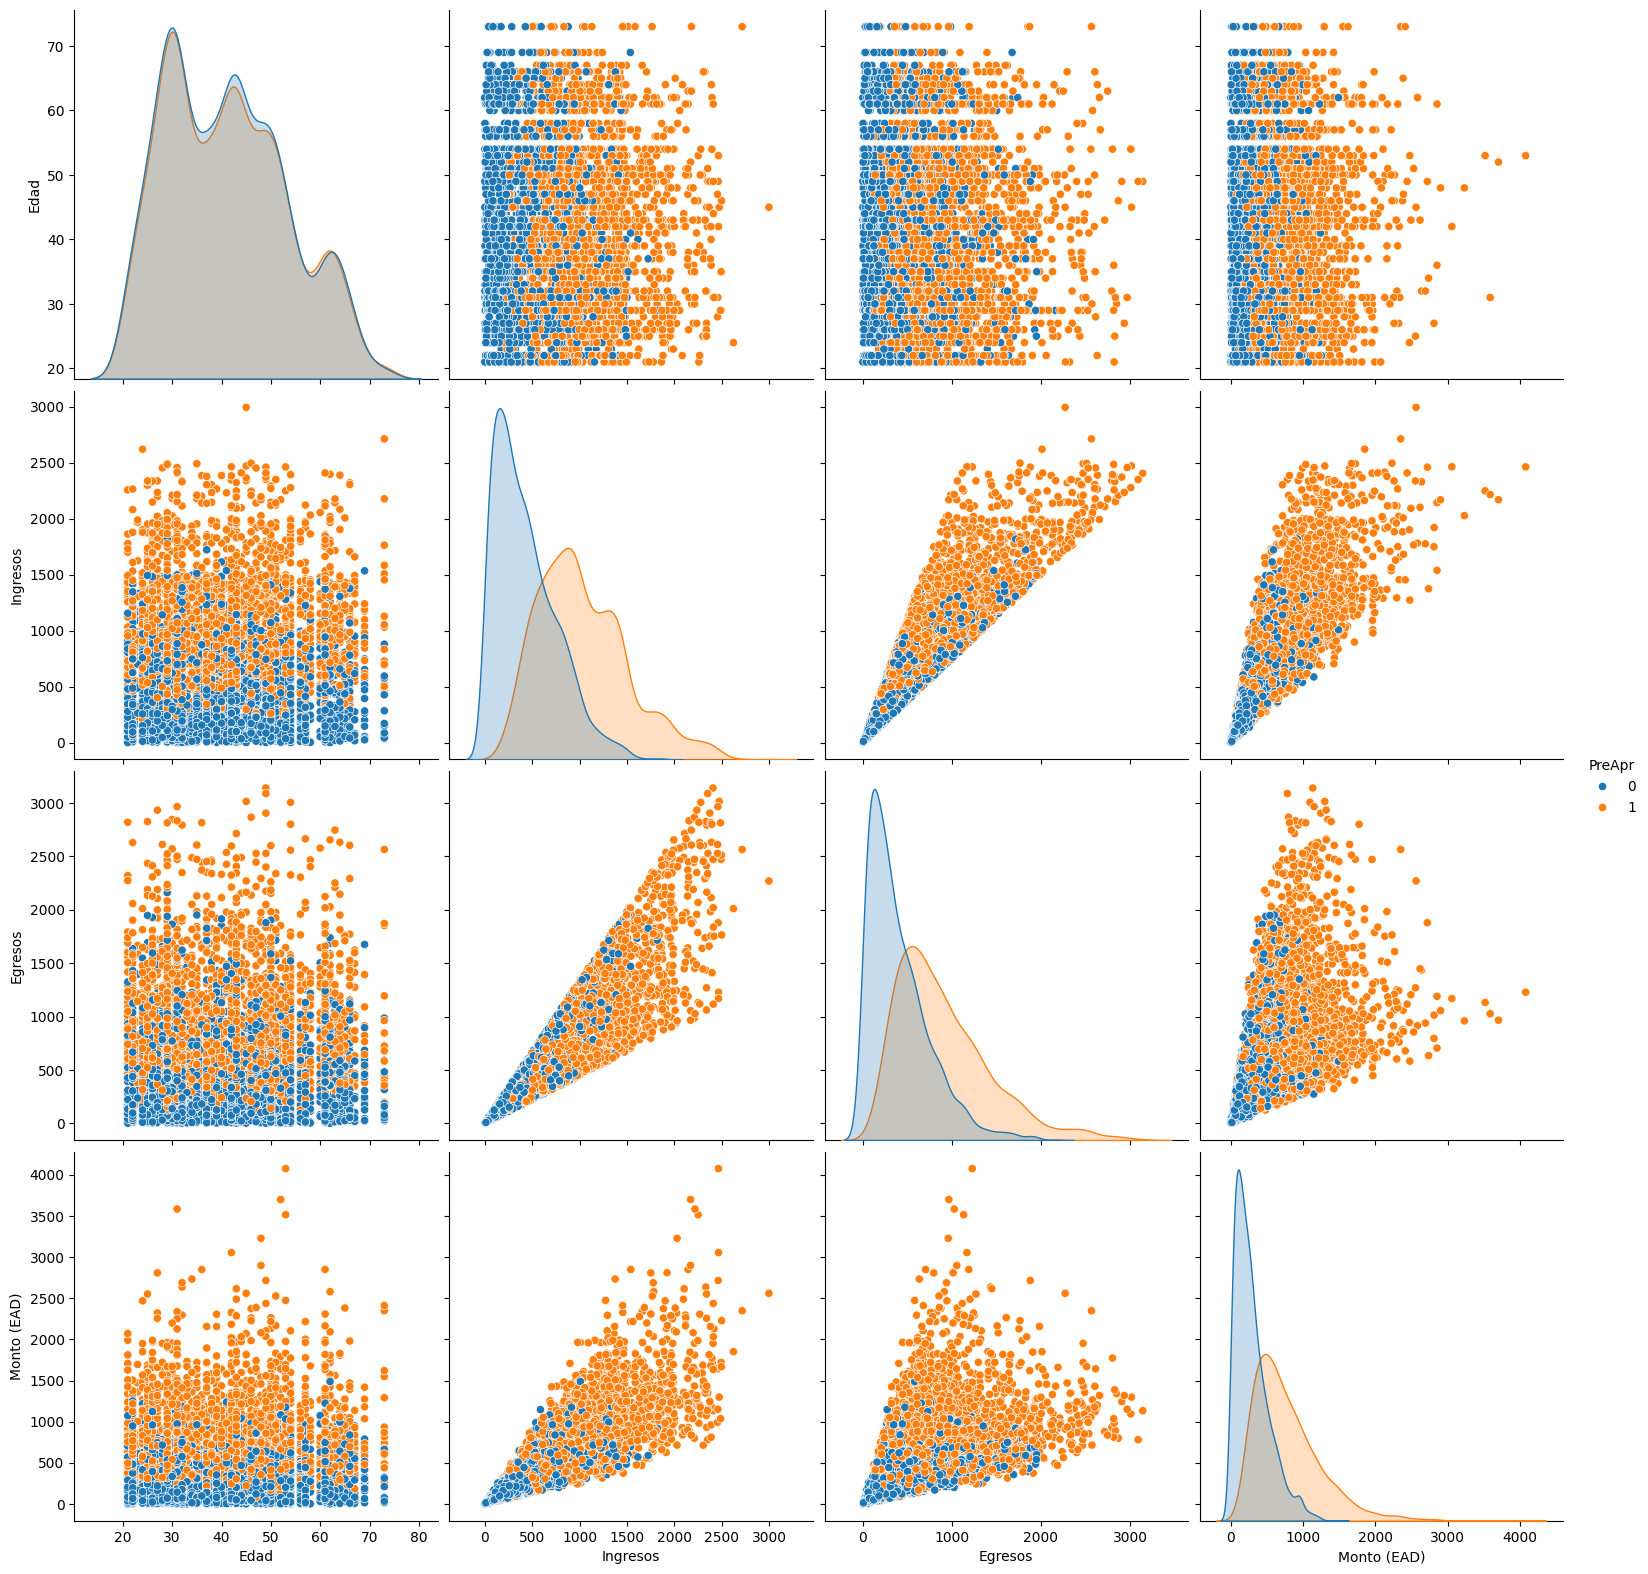

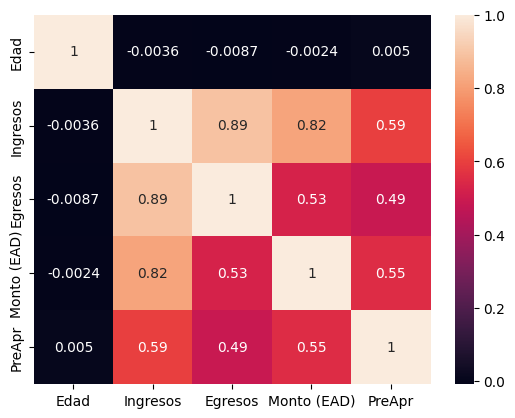

In [ ]:
nxl='/content/6. SolicitantesCrédito(USD) (Original).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB.head()

#Seleccionamos las variables de trabajo
XDB=XDB[['Edad','Ingresos','Egresos','Monto (EAD)','PreApr']]
XDB.dropna()

#Seleccionamos los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:4])
yd=np.array(XDB.iloc[:,4])

#Graficos de correlacion
import seaborn as sns
sns.pairplot(XDB,hue='PreApr',size=4,vars=['Edad','Ingresos','Egresos','Monto (EAD)'])

plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

2. se procede con la implementacion del modelo de clusterizacion

,Edad,Ingresos,Egresos,Monto (EAD)
0,41.130456,700.941819,594.228751,529.667652
1,40.904412,1930.511433,2026.035991,1140.801060
2,40.963955,1167.564578,1226.937727,655.305271
3,40.810309,1375.632247,823.620060,1499.463671
4,41.072289,236.551926,207.188730,170.964605


Los clusters a los que las personas pertenecen son: [2 4 0 ... 0 0 2]


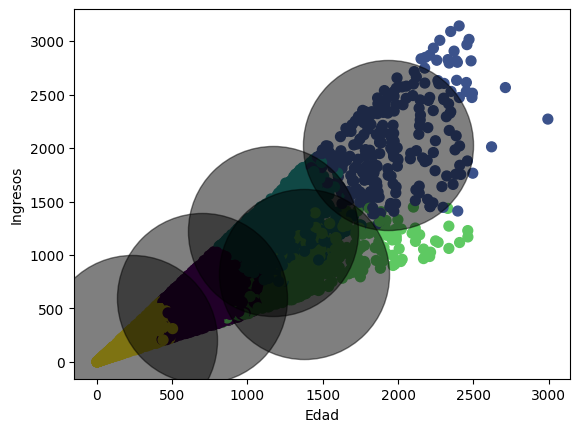

In [ ]:
np.random.seed(42) #Se generan los mismos numeros aleatorios
#NC son las cualidades con las que se puede descuidar una variable
NC=5 #Nuemro de clusters
mkm=KMeans(n_clusters=NC,init='random',random_state=42)
mkm.fit(XD,yd)

#Cuales son los graficos creeados
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=['Edad','Ingresos','Egresos','Monto (EAD)']
display(dfc)

#Cluster me ayuda a identificar caracteristicas so cio economicas de sucursales bancarias
#Sucursales bancarias: %PreAApr - %PreNeg

#A que sucursal o cluster pertenece una persona
ydc=mkm.predict(XD)
print('Los clusters a los que las personas pertenecen son:',ydc)

#Se procede con la grafica de los clusters
centroide=mkm.cluster_centers_
plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(centroide[:,1],centroide[:,2],c='black',s=15000,alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()


3. Se determina los porcentajes de preaprobacion por categoria cluster

In [ ]:
ND=np.bincount(ydc)
XDB['Cluster']=ydc
display(XDB)

NApr=XDB.groupby('Cluster').agg({'PreApr':lambda x: (x==1).sum()})
NAprp=np.array(NApr)/ND[:,None]
Nneg=XDB.groupby('Cluster').agg({'PreApr':lambda x: (x==0).sum()})
Nnegp=np.array(Nneg)/ND[:,None]

df2=pd.DataFrame(np.column_stack((ND,NApr,Nneg,NAprp,Nnegp)))
df2.columns=['ND','NApr','Nneg','%Apr','%Neg']
display(df2)

,Edad,Ingresos,Egresos,Monto (EAD),PreApr,Cluster
0,38,1356.14400,1685.622667,625.562230,1,2
1,51,286.01600,364.462000,140.031984,1,4
2,37,517.46325,629.208889,284.564492,0,0
3,29,473.27000,551.616889,309.647588,1,0
4,42,750.09175,806.715778,500.663578,1,0
...,...,...,...,...,...,...
5837,48,1207.84800,753.801111,748.041791,1,2
5838,31,1472.77200,953.812889,870.793819,1,2
5839,38,773.01975,672.910667,594.947894,1,0
5840,43,635.50175,780.691556,305.580539,1,0


,ND,NApr,Nneg,%Apr,%Neg
0,2039.0,1136.0,903.0,0.557136,0.442864
1,272.0,261.0,11.0,0.959559,0.040441
2,971.0,745.0,226.0,0.767250,0.232750
3,485.0,472.0,13.0,0.973196,0.026804
4,2075.0,269.0,1806.0,0.129639,0.870361


4.Evaluacion del desempeño del modelo

In [ ]:
from re import X
ydp=np.zeros((len(ydc),1)) #Vector pronostico - misma longitud ydc

for k in range(len(ydp)):
  print('La persona:',k,'pertenece al cluster:',ydc[k])
  ncl=ydc[k] #Esto para almacenar el numero de clusters
  print('El porcentaje de negacion es:',Nnegp[ncl]) #Busca % Neg
  print('El porcentaje de aprovacion es:',NAprp[ncl]) #Busca % Apr

  if NAprp[ncl]>Nnegp[ncl]:
    print('Se aprueba')
    ydp[k]=1
  else:
    print('Se niega')
    ydp[k]=0

XDB['Pronostico']=ydp #Adiciono una columna a la tabla original
display(XDB)
XDB.to_excel('InformeCloster.xlsx')



Streaming output truncated to the last 5000 lines.
La persona: 4592 pertenece al cluster: 3
El porcentaje de negacion es: [0.02680412]
El porcentaje de aprovacion es: [0.97319588]
Se aprueba
La persona: 4593 pertenece al cluster: 4
El porcentaje de negacion es: [0.87036145]
El porcentaje de aprovacion es: [0.12963855]
Se niega
La persona: 4594 pertenece al cluster: 0
El porcentaje de negacion es: [0.44286415]
El porcentaje de aprovacion es: [0.55713585]
Se aprueba
La persona: 4595 pertenece al cluster: 2
El porcentaje de negacion es: [0.23274974]
El porcentaje de aprovacion es: [0.76725026]
Se aprueba
La persona: 4596 pertenece al cluster: 0
El porcentaje de negacion es: [0.44286415]
El porcentaje de aprovacion es: [0.55713585]
Se aprueba
La persona: 4597 pertenece al cluster: 0
El porcentaje de negacion es: [0.44286415]
El porcentaje de aprovacion es: [0.55713585]
Se aprueba
La persona: 4598 pertenece al cluster: 1
El porcentaje de negacion es: [0.04044118]
El porcentaje de aprovacion

,Edad,Ingresos,Egresos,Monto (EAD),PreApr,Cluster,Pronostico
0,38,1356.14400,1685.622667,625.562230,1,2,1.0
1,51,286.01600,364.462000,140.031984,1,4,0.0
2,37,517.46325,629.208889,284.564492,0,0,1.0
3,29,473.27000,551.616889,309.647588,1,0,1.0
4,42,750.09175,806.715778,500.663578,1,0,1.0
...,...,...,...,...,...,...,...
5837,48,1207.84800,753.801111,748.041791,1,2,1.0
5838,31,1472.77200,953.812889,870.793819,1,2,1.0
5839,38,773.01975,672.910667,594.947894,1,0,1.0
5840,43,635.50175,780.691556,305.580539,1,0,1.0


5. Evaluamos una persona

La persona pertenece al cluster: [2]
El porcentaje de PreApr es: [[0.76725026]]
El porcentaje de PreNeg es: [[0.23274974]]


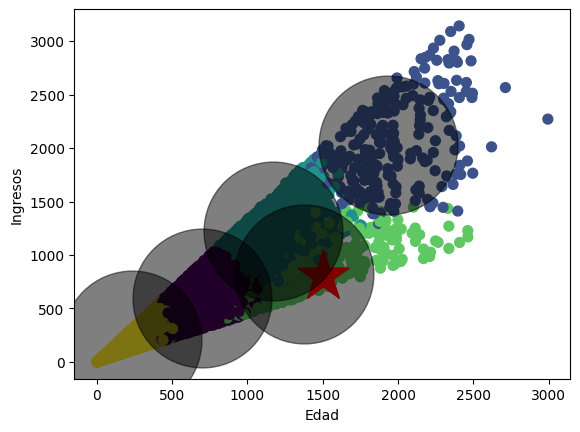

In [ ]:
XDN=np.array([40,1500, 800, 500])

ydn=mkm.predict(XDN.reshape(1,-1))

print('La persona pertenece al cluster:',ydn)
print('El porcentaje de PreApr es:', NAprp[ydn])
print('El porcentaje de PreNeg es:', Nnegp[ydn])

plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(XDN[1],XDN[2],marker='*',s=1500,facecolors='red')
plt.scatter(centroide[:,1],centroide[:,2],c='black',s=10000,alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

#Analisis de desempeño
cm=confusion_matrix(yd,ydc) #ydp es aprobacion o negacion 0,1
                            #ydc es el cluster de pertenencia 0,1,2,3,,4,5
print(cm)
#Falta colocar todas las metricas


Analisis de resultado
Para este estudio de créditos frente a la PreAprobación se tomaron un total de 5848 de los cuales 2959 son aprobados y 2848 son negados. Para la caracterización de la preaprobación se tomaron 4 variables socioeconómicas que son: Edad, Ingresos, Egresos, y Monto. El modelo utilizado para esta caracterización fue el modelo de agrupación KMeans, el cual mostró que las variables que tenian un mayor correlación entre ellas fueron las variables de Ingresos y Egresos (89%), mientras que la mayor correlación con la variable de salida (PreApr), fue la variable Ingresos (59%), lo que indica que esta variable es la más relevante frente a la preaprobación.
Para este modelo se tomaron un total de 5 clusters, en donde el cluster 0, mostro la mayor edad, el cluster 1 mostró los mayores ingresos (1930), mientras que este mismo cluster presento los mayores egresos (2026). El cluster que presentó la mayor cantidad de datos fue el cluster 4 (2075), mientras que el cluster que presentó los mayores niveles de preaprobación fue el cluster 3 (97%), mientras que el cluster 4 mostró los mayores niveles de negación (87%).
